---
# 10. Classification models Exercise
---

In [1]:
# 実行
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 実行
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, roc_curve, auc, f1_score, precision_score, recall_score, precision_recall_curve

In [3]:
# 実行
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
# 実行
from sklearn.datasets import load_wine

In [5]:
# 実行
wine = load_wine()
X, y = load_wine(return_X_y=True)
df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1), columns=wine['feature_names'] + ['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
# 実行
df['target'].value_counts()
# 多クラス（3クラス）分類

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

In [7]:
# 実行
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [8]:
# 実行
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Exercise_1 : 相関関係をヒートマップで表現してください

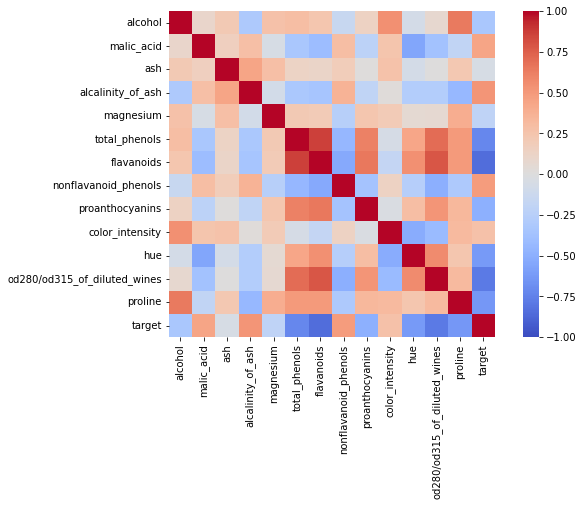

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), square=True, vmin=-1, cmap='coolwarm')   #
plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>sns.heatmap(df.corr(), square=True, vmin=-1, cmap='coolwarm')</code>
</details>

Exercise_2 : 下記の関数を完成させてください（データ分布の3プロット）

In [10]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
    sns.histplot(data=df, y=feature, hue='target', multiple='dodge', ax=axes[0])   #
    sns.boxplot(data=df, x='target', y=feature, ax=axes[1], width=0.8)   #
    sns.swarmplot(data=df, x='target', y=feature, ax=axes[2], alpha=0.8, size=3)   #
    plt.suptitle(feature)
    plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>y=feature</code>
</details>

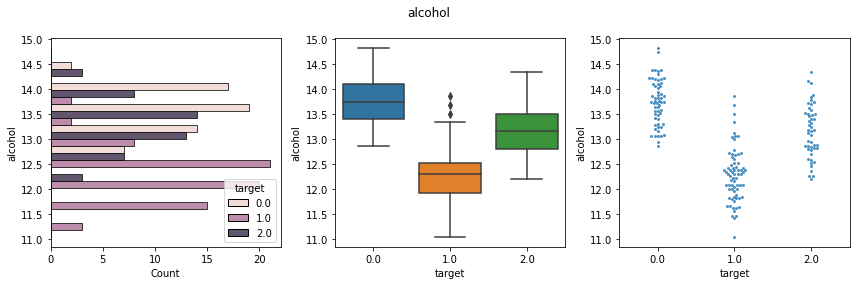

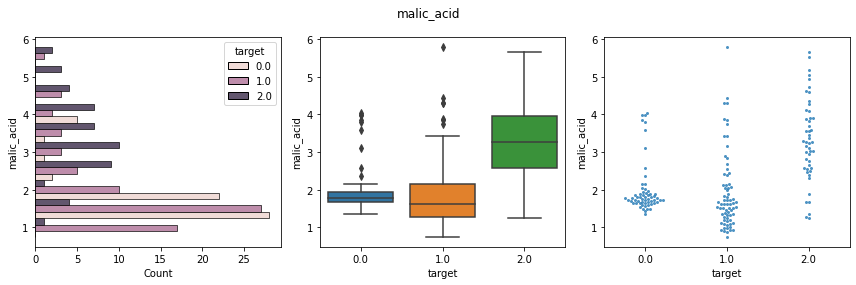

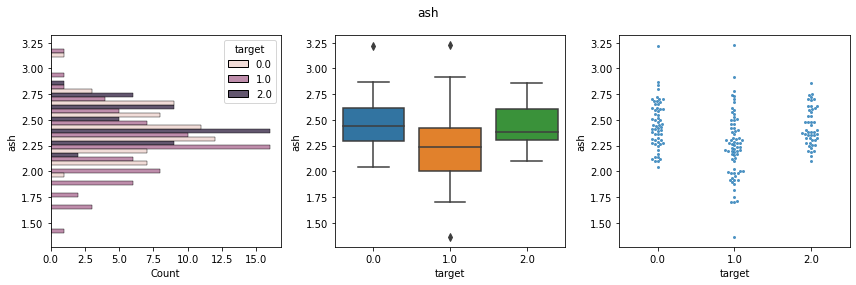

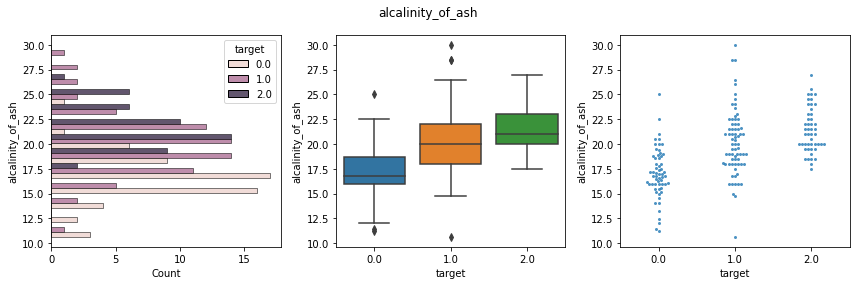

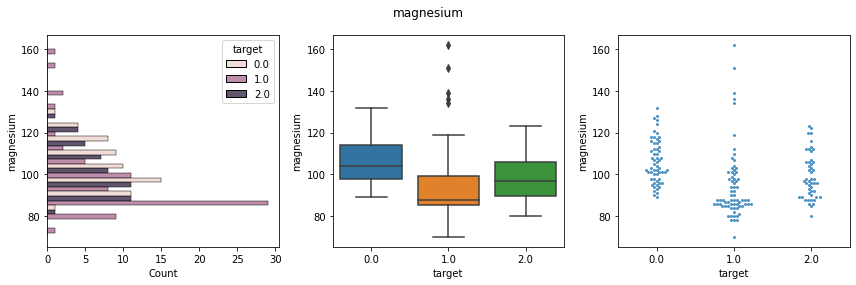

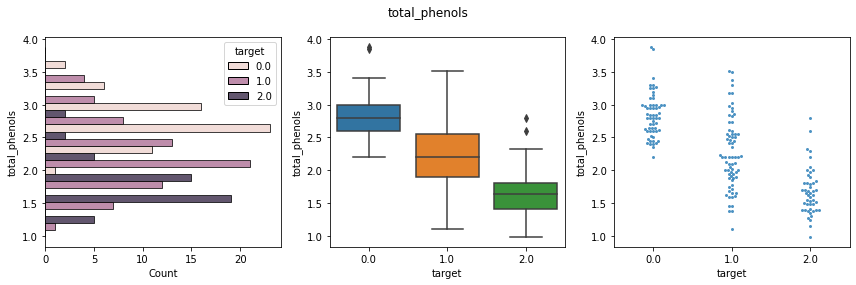

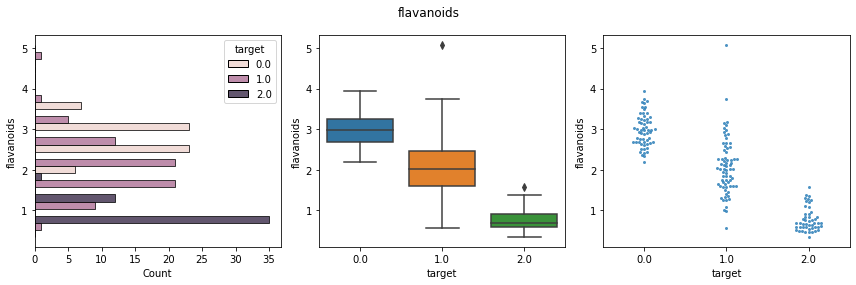

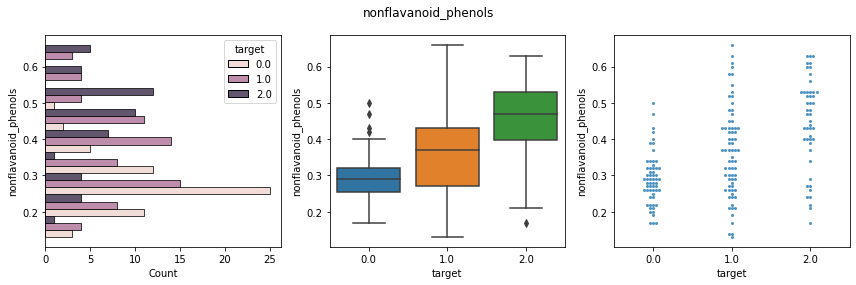

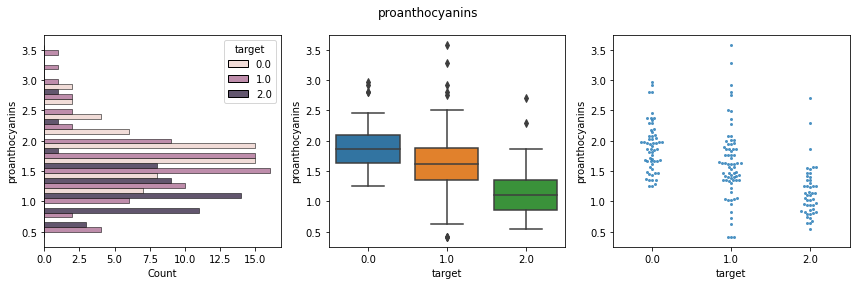

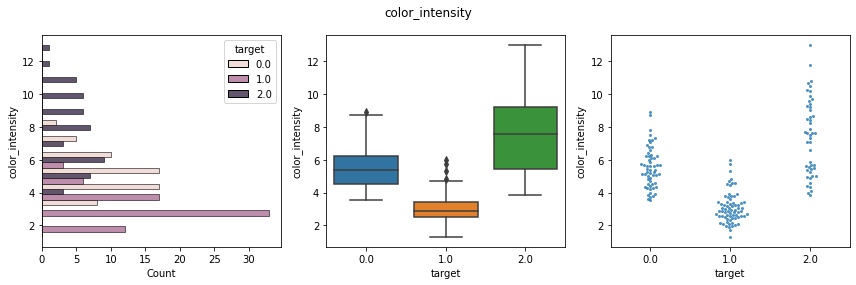

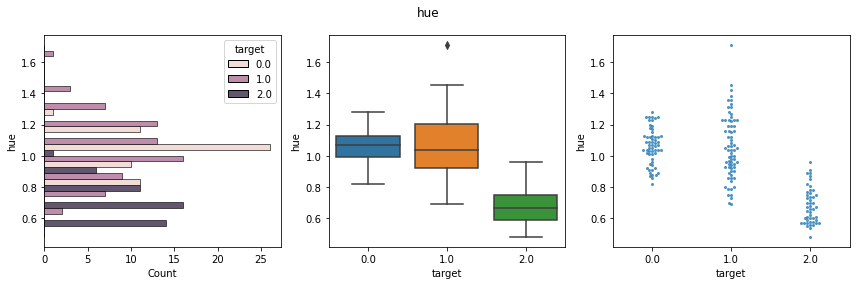

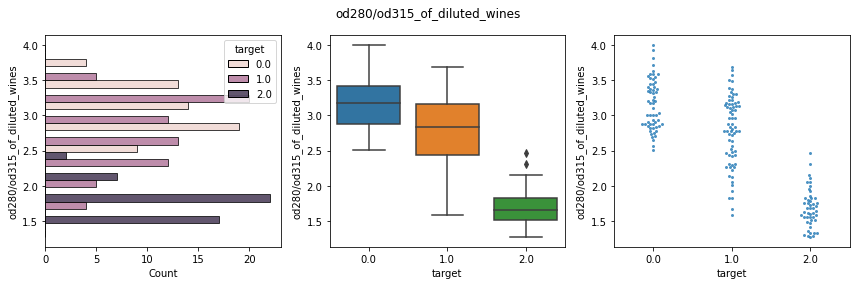

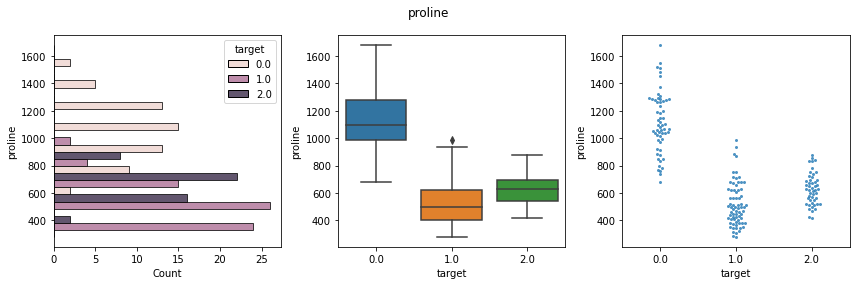

In [11]:
# 実行
for feature in df.columns[:-1]:
    plot_data(feature)

Exercise_3 : 下記に引数の指定を追加して、Xとyで目的変数のクラスの割合がほぼ等しくなるように分割をしてください（精度が高くなりすぎるので、説明変数は1-5の5つのみを使用します）

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 1:6], y, test_size=0.3, random_state=17, stratify=y)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>stratify=y</code>
</details>

Exercise_4 : 多クラス分類ができるようにsvc_modelのkernelを'linear'にし、また確率（probability）をpredict_proba()で取得できるよう引数を指定してください。また、log_modelへも多クラス分類へ対応できるようにsolverに'newton-cg'を設定して下さい。

In [13]:
rf_model = RandomForestClassifier(random_state=17)
kn_model = KNeighborsClassifier()
svc_model = SVC(random_state=17, kernel='linear', probability=True)
log_model = LogisticRegression(random_state=17, solver='newton-cg')

models = [rf_model, kn_model, svc_model, log_model]

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>probability=True, kernel='linear'</code><br>
    <code>solver='newton-cg'</code>
</details>

In [14]:
# 実行
# 予測などを格納する辞書
mets = {rf_model:{}, kn_model:{}, svc_model:{}, log_model:{}}

Exercise_5 : モデルの構築、予測、スコア（f1スコア）、確率の部分を埋めて、下記の関数を完成させてください。

In [15]:
def predict_and_metrics(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    proba = model.predict_proba(X_test)
    mets[model]['pred'] = pred
    mets[model]['score'] = score
    mets[model]['proba'] = proba

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code></code>pred = model.predict(X_test)<br>
    <code></code>score = model.score(X_test, y_test)<br>
    <code></code>proba = model.predict_proba(X_test)<br>
</details>

In [16]:
# 実行
# 何も表示はされません
for model in models:
    predict_and_metrics(model)

Exercise_6 : 混同行列を描画する下記の関数を辞書metsを利用して完成させてください。　ヒント　(true_label, prediction_label)

In [17]:
def conf_matrix(model):
    sns.heatmap(confusion_matrix(y_test, mets[model]['pred']), annot=True)   #
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(model)

    plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code> sns.heatmap(confusion_matrix(y_test, mets[model]['pred']), annot=True)</code>
</details>

Exercise_7 : 分類レポートをプリントするための下記の関数を完成させてください

In [18]:
def report(model):
    print(model)
    print(classification_report(y_test, mets[model]['pred']))
    print('======================')

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>print(classification_report(y_test, mets[model]['pred']))</code>
</details>

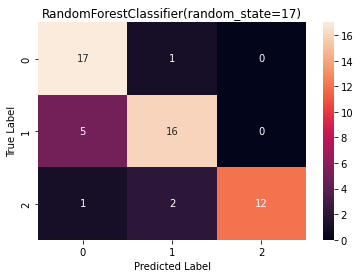

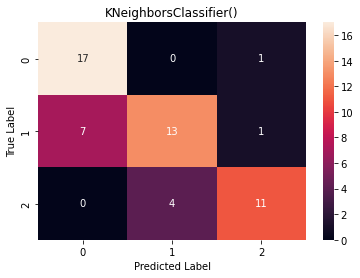

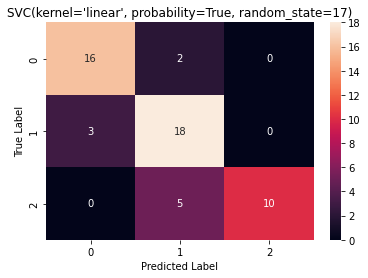

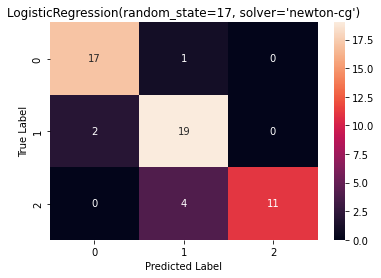

In [19]:
# 実行
for model in models:
    conf_matrix(model)

Exercise_8 : 上記のlog_modelの混合行列を参照して、三つのラベルに対する適合率、再現率をそれぞれ計算してください（17/20のようにして）

In [20]:
# 適合率
# 0.8947368421052632, 0.7916666666666666, 1.0
17/19, 19/24, 11/11

(0.8947368421052632, 0.7916666666666666, 1.0)

In [21]:
# 再現率
# 0.9444444444444444, 0.9047619047619048, 0.7333333333333333
17/18, 19/21, 11/15

(0.9444444444444444, 0.9047619047619048, 0.7333333333333333)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>17/19, 19/24, 11/11</code><br>
    <code>17/18, 19/21, 11/15</code>
</details>

Exercise_9 : 同様にlog_modelについてprecision_score, recall_score, f1_scoreの関数を使って各ラベル別にそれらの値を算出してください。　　ヒント　引数にaverageを使う

In [22]:
# 適合率
precision_score(y_test, mets[log_model]['pred'], average=None)

array([0.89473684, 0.79166667, 1.        ])

In [23]:
# 再現率
recall_score(y_test, mets[log_model]['pred'], average=None)

array([0.94444444, 0.9047619 , 0.73333333])

In [24]:
# F1スコア
f1_score(y_test, mets[log_model]['pred'], average=None)

array([0.91891892, 0.84444444, 0.84615385])

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>precision_score(y_test, mets[log_model]['pred'], average=None)</code><br>
    <code>recall_score(y_test, mets[log_model]['pred'], average=None)</code><br>
    <code>f1_score(y_test, mets[log_model]['pred'], average=None)</code><br>
</details>

In [25]:
# 実行
# 上のふたつのエクササイズの数値と等しいことを確認してください
for model in models:
    report(model)

RandomForestClassifier(random_state=17)
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.84      0.76      0.80        21
           2       1.00      0.80      0.89        15

    accuracy                           0.83        54
   macro avg       0.86      0.84      0.84        54
weighted avg       0.85      0.83      0.83        54

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.76      0.62      0.68        21
           2       0.85      0.73      0.79        15

    accuracy                           0.76        54
   macro avg       0.77      0.77      0.76        54
weighted avg       0.77      0.76      0.75        54

SVC(kernel='linear', probability=True, random_state=17)
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
          

In [26]:
# 実行
from sklearn.model_selection import StratifiedKFold, GridSearchCV

Exercise_10 : StratifiedKFoldを使い、5分割、シャッフル、ランダムステート＝17としてkを作成してください（KFoldと同じ使い方です）

In [27]:
k = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>k = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)</code>
</details>

In [28]:
# 実行
set1, set2, set3, set4, set5 = k.split(X, y)

In [29]:
# 実行
# set1に割り当てられたインデックスが表示されます。二つ目のアレイが分類ラベルを持つyになります。
set1

(array([  0,   1,   2,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,
         15,  16,  18,  20,  21,  22,  23,  24,  25,  26,  27,  28,  30,
         31,  33,  34,  35,  36,  37,  38,  40,  42,  43,  46,  47,  48,
         50,  51,  52,  53,  54,  56,  57,  58,  59,  60,  61,  64,  65,
         66,  67,  68,  71,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 111,
        112, 113, 114, 117, 118, 119, 120, 121, 122, 124, 127, 128, 129,
        130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144,
        145, 148, 149, 150, 152, 153, 154, 155, 156, 157, 159, 161, 162,
        163, 164, 166, 167, 168, 169, 170, 172, 173, 174, 176, 177]),
 array([  3,   8,  17,  19,  29,  32,  39,  41,  44,  45,  49,  55,  62,
         63,  69,  70,  72,  95,  96, 107, 110, 115, 116, 123, 125, 126,
        132, 142, 146, 147, 151, 158, 160, 165, 171, 1

In [30]:
# 以下の5つを実行してください
# 0,1,2のラベルがほぼ均等に分割されていることが分かります
df.loc[set1[1]]['target'].value_counts()

1.0    14
0.0    12
2.0    10
Name: target, dtype: int64

In [31]:
df.loc[set2[1]]['target'].value_counts()

1.0    14
0.0    12
2.0    10
Name: target, dtype: int64

In [32]:
df.loc[set3[1]]['target'].value_counts()

1.0    14
0.0    12
2.0    10
Name: target, dtype: int64

In [33]:
df.loc[set4[1]]['target'].value_counts()

1.0    14
0.0    12
2.0     9
Name: target, dtype: int64

In [34]:
df.loc[set5[1]]['target'].value_counts()

1.0    15
0.0    11
2.0     9
Name: target, dtype: int64

Exercise_11 : rf_model_newに対してグリッドサーチを実行します。gridに三つの引数（モデル、パラメータ、cv)を設定してください。

In [35]:
# 実行
rf_model_new = RandomForestClassifier(random_state=17)

In [36]:
# 実行
params = {
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 0.8, 1]
}

In [37]:
grid = GridSearchCV(
    rf_model_new,
    param_grid=params,
    cv=k
)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>grid = GridSearchCV(
            rf_model_new,
            param_grid=params,
            cv=k
            )</code>
</details>

In [38]:
# 実行
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=RandomForestClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 0.8, 1]})

In [39]:
# 実行
# ランキングトップの三つを表示
pd.DataFrame(grid.cv_results_).loc[:, 'params':].sort_values('rank_test_score', ascending=True)[:3]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,"{'criterion': 'gini', 'max_features': 1}",1.0,1.000000,0.972222,0.971429,1.0,0.988730,0.013805,1
5,"{'criterion': 'entropy', 'max_features': 1}",1.0,1.000000,0.972222,0.971429,1.0,0.988730,0.013805,1
4,"{'criterion': 'entropy', 'max_features': 0.8}",1.0,0.972222,0.944444,0.971429,1.0,0.977619,0.020832,3


In [40]:
# 実行
grid.best_params_

{'criterion': 'gini', 'max_features': 1}

In [41]:
# すでに作成しているmetsを実行して確認
mets

{RandomForestClassifier(random_state=17): {'pred': array([0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1,
         2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2,
         0, 0, 2, 0, 1, 0, 1, 0, 1, 2]),
  'score': 0.8333333333333334,
  'proba': array([[0.66, 0.31, 0.03],
         [0.  , 0.43, 0.57],
         [0.  , 0.04, 0.96],
         [0.96, 0.03, 0.01],
         [0.71, 0.23, 0.06],
         [0.91, 0.07, 0.02],
         [0.  , 0.06, 0.94],
         [0.03, 0.87, 0.1 ],
         [0.89, 0.09, 0.02],
         [0.  , 0.04, 0.96],
         [0.72, 0.24, 0.04],
         [0.01, 0.91, 0.08],
         [0.04, 0.88, 0.08],
         [0.01, 0.13, 0.86],
         [0.03, 0.97, 0.  ],
         [0.98, 0.02, 0.  ],
         [0.03, 0.84, 0.13],
         [0.63, 0.33, 0.04],
         [0.96, 0.04, 0.  ],
         [0.17, 0.65, 0.18],
         [0.97, 0.03, 0.  ],
         [0.16, 0.59, 0.25],
         [0.  , 0.14, 0.86],
         [0.43, 0.52, 0.05],
         [0.71, 0.26, 0.

In [42]:
# 実行して、下記が何を表すかを確認してください
y_test==0

array([ True, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False,  True, False, False, False,  True, False, False])

In [43]:
# 実行
# 上記を利用して、precision, recall, thresholdを取得できます
precision, recall, threshold = precision_recall_curve(y_test==2, mets[rf_model]['proba'][:, 2])

Exercise_12 : 上記の性質を利用して、分類ラベル（目的変数のラベル）である、0,1,2のprecision, recall, thresholdを取得してください

In [44]:
p0, r0, t0 = precision_recall_curve(y_test==0, mets[rf_model]['proba'][:, 0])
p1, r1, t1 = precision_recall_curve(y_test==1, mets[rf_model]['proba'][:, 1])
p2, r2, t2 = precision_recall_curve(y_test==2, mets[rf_model]['proba'][:, 2])

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>p0, r0, t0 = precision_recall_curve(y_test==0, mets[rf_model]['proba'][:, 0])</code><br>
    <code>p1, r1, t1 = precision_recall_curve(y_test==1, mets[rf_model]['proba'][:, 1])</code><br>
    <code>p2, r2, t2 = precision_recall_curve(y_test==2, mets[rf_model]['proba'][:, 2])</code>
</details>

Exercise_13 : 上記のp0, r0などを利用してF1スコアを調和平均の式を使って求め、リストにしてください（リスト内包表記で）

In [45]:
f0 = [2*pre*rec / (pre + rec) for pre, rec in zip(p0, r0)]
f1 = [2*pre*rec / (pre + rec) for pre, rec in zip(p1, r1)]
f2 = [2*pre*rec / (pre + rec) for pre, rec in zip(p2, r2)]

prft = [[p0, r0, f0, t0], [p1, r1, f1, t1], [p2, r2, f2, t2]]

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>f0 = [2*pre*rec / (pre + rec) for pre, rec in zip(p0, r0)]</code><br>
    <code>f1 = [2*pre*rec / (pre + rec) for pre, rec in zip(p1, r1)]</code><br>
    <code>f2 = [2*pre*rec / (pre + rec) for pre, rec in zip(p2, r2)]</code>
</details>

Exercise_14 : precision, recall, f1スコア, thresholdを使った曲線を描きます。下記の関数を完成させてください。ヒント　thresholdのlenは1だけ短い

In [64]:
def f1_pr_curve(p, r, f, t):
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=t, y=f[:-1], label='f1 score')
    sns.lineplot(x=t, y=r[:-1], label='recall')
    sns.lineplot(x=t, y=p[:-1], label='precision')
    plt.xlabel('threshold')
    plt.legend()
    plt.show()

<details >
<summary > <font color = 'red'> 解答はここをクリック </font> </summary >
<code > sns.lineplot(x=t, y=f[:-1], label='f1 score') < /code > <br >
<code > sns.lineplot(x=t, y=r[:-1], label='recall') < /code > <br >
<code > sns.lineplot(x=t, y=p[:-1], label='precision') < /code >
</details >


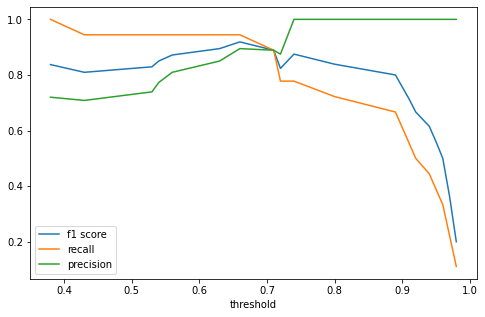

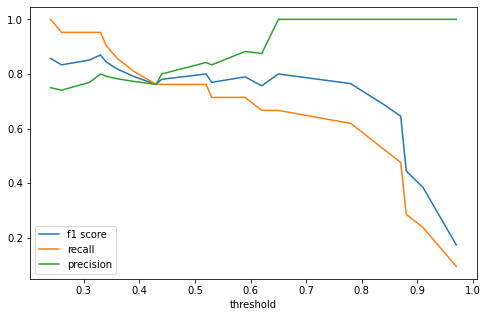

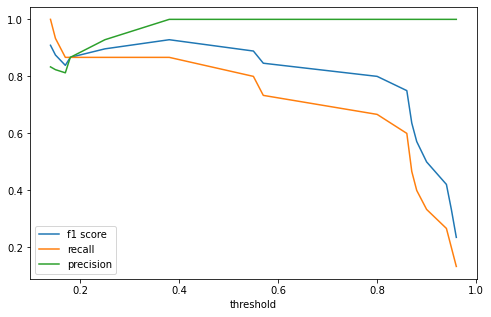

In [62]:
# 実行
for p, r, f, t in prft:
    f1_pr_curve(p, r, f, t)

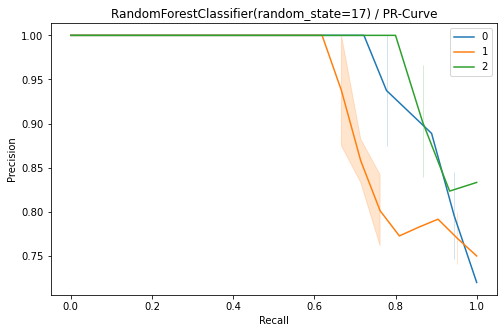

In [63]:
# 実行
# 3つ（分類ラベル別）のPR曲線を描画

plt.figure(figsize=(8,5))
#     横軸にrecall,縦軸にprecision
sns.lineplot(x=r0, y=p0, label=0)
sns.lineplot(x=r1, y=p1, label=1)
sns.lineplot(x=r2, y=p2, label=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'{model} / PR-Curve')
plt.legend()
plt.show()

In [49]:
# 実行
# 新規にモデルを作成
model = RandomForestClassifier(random_state=17)
model.fit(X_train, y_train==0)

RandomForestClassifier(random_state=17)

Exercise_15 : X_testのデータに対する予想確率を取得してください

In [50]:
prob = model.predict_proba(X_test)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>prob = model.predict_proba(X_test)</code>
</details>

Exercise_16 : 分類ラベルが0であるかないかの二値で考えて、そのROCカーブを描画します。

In [51]:
# 実行
y_test==0
# Trueが１、Falseが0と認識され,1と0のアレイとなります
# これを利用してください

array([ True, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False,  True, False, False, False,  True, False, False])

c:\Users\kzyik\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


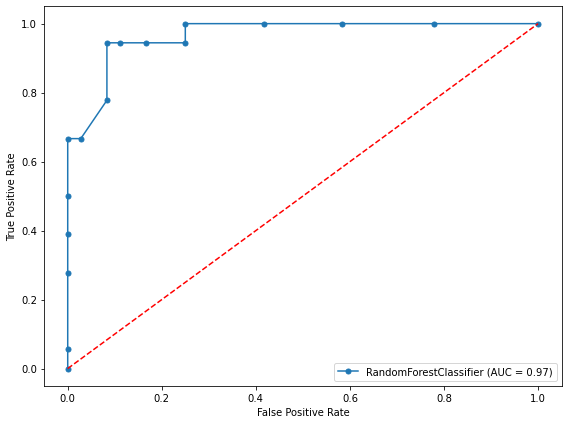

In [52]:
fig, axes = plt.subplots(figsize=(8, 6), tight_layout=True)
plot_roc_curve(model, X_test, y_test==0, ax=axes, marker='o', markersize=5)    # 
axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', ax=axes)
plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>plot_roc_curve(model, X_test, y_test==0, ax=axes, marker='o', markersize=5) </code>
</details>

Exercise_17 : roc_curveを用いてfpr, tpr, threshを取得してください。ただし、y_test==0のTrueは1であり、probの2列目（インデックス1）にその確率は表示されることに注意してください。

In [53]:
fpr, tpr, thresh = roc_curve(y_test==0, prob[:, 1])

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>fpr, tpr, thresh = roc_curve(y_test==0, prob[:, 1])</code>
</details>

In [54]:
# 実行
# 0.9660493827160495
auc(fpr, tpr)

0.9660493827160495

## 以上